# Importing the datasets

In [2]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# Location where my CSV files are stored:
file_path = r'C:\Users\m.elbaz\OneDrive - SHOWROOMPRIVE.COM\Documents\IH\board_games_project\board_games_project\Csvs post cleaning'

## Importing df_games

In [4]:
# Importing the main dataframe 'games.csv'
df_games = pd.read_csv(file_path + '/df_games.csv')

# Display the dataframe:
display(df_games.head(3))

# looking at the size of the df
print(df_games.shape)

,bgg_id,name,description,year_published,game_difficulty,rating,bayes_avg_rating,std_dev,min_players,max_players,...,com_min_playtime,com_max_playtime,manufacturer_age_reco,number_user_ratings,num_comments,num_alternates,num_expansions,num_implementations,is_reimplementation,kickstarted
0,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,30,30,12.0,562,0,0,0,2,1,0
1,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,30,60,10.0,15146,0,6,0,1,0,0
2,4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,60,60,12.0,340,0,0,0,0,0,0


(16832, 28)


In [5]:
df_games.columns.tolist()

['bgg_id',
 'name',
 'description',
 'year_published',
 'game_difficulty',
 'rating',
 'bayes_avg_rating',
 'std_dev',
 'min_players',
 'max_players',
 'community_age_min_reco',
 'language_ease',
 'best_players',
 'num_owned',
 'num_want',
 'num_wish',
 'num_weight_votes',
 'manufacturer_stated_play_time',
 'com_min_playtime',
 'com_max_playtime',
 'manufacturer_age_reco',
 'number_user_ratings',
 'num_comments',
 'num_alternates',
 'num_expansions',
 'num_implementations',
 'is_reimplementation',
 'kickstarted']

## Importing the other dataframes in binary format

In [6]:
# Importer les DataFrames
df_categories = pd.read_csv(file_path + '/df_categories.csv')
df_mechanics = pd.read_csv(file_path + '/df_mechanics.csv')
df_themes = pd.read_csv(file_path + '/df_themes.csv')
df_designers = pd.read_csv(file_path + '/df_designers.csv')
df_publishers = pd.read_csv(file_path + '/df_publishers.csv')

# Afficher les premières lignes de chaque DataFrame pour vérifier l'importation
print("Categories:")
print(df_categories.head())

print("\nMechanics:")
print(df_mechanics.head())

print("\nThemes:")
print(df_themes.head())

print("\nDesigners:")
print(df_designers.head())

print("\nPublishers:")
print(df_publishers.head())

Categories:
   bgg_id  thematic  strategy  war  family  card games  abstract  party  \
0       1         0         1    0       0           0         0      0   
1       2         0         1    0       0           0         0      0   
2       3         0         1    0       0           0         0      0   
3       4         0         0    0       0           0         0      0   
4       5         0         1    0       0           0         0      0   

   childrens  
0          0  
1          0  
2          0  
3          0  
4          0  

Mechanics:
   bgg_id  alliances  area majority / influence  auction/bidding  \
0       1          1                          1                1   
1       2          0                          0                0   
2       3          0                          1                0   
3       4          0                          1                1   
4       5          0                          0                0   

   dice rolling  hand mana

# Making a selection for the columns on each df

To keep on mind: <br>
The idea here is to respond the following question: does my column (variable) explains my average rating ? <br>
We'll then select a limited number of column having a direct link with the avg rating or that could explain it  
<br>

Regarding the selection (features to keep): <br>
--> For the other binary dataframes just below df_games, the criteria of selection for the theme, category or mechanics was to choose columns with the maximum quantity, then dice rolling, set collection and hand management are the mechanics that are the most represented into the df_mechanics dataset

--> We do the same for designers and publishers, and we add low_exp designer/publisher, so we can compare later wether a low expereicned publisher or designer has a lower average rating

## df_games selection

In [7]:
# Liste des colonnes à conserver
columns_to_keep = [
    'bgg_id', 'name', 'game_difficulty', 'rating', 'min_players', 'max_players',
    'manufacturer_stated_play_time', 'manufacturer_age_reco', 'num_comments',
    'num_alternates', 'num_expansions', 'kickstarted'
]

# Créer le DataFrame df_games_selection avec les colonnes spécifiées
df_games_selection = df_games[columns_to_keep]

# Afficher les premières lignes du nouveau DataFrame pour vérifier la sélection
display(df_games_selection.head())

,bgg_id,name,game_difficulty,rating,min_players,max_players,manufacturer_stated_play_time,manufacturer_age_reco,num_comments,num_alternates,num_expansions,kickstarted
0,2,Dragonmaster,1.9630,6.64537,3,4,30,12.0,0,0,0,0
1,3,Samurai,2.4859,7.45601,2,4,60,10.0,0,6,0,0
2,4,Tal der Könige,2.6667,6.60006,2,4,60,12.0,0,0,0,0
3,8,Lords of Creation,2.4000,6.10716,2,5,120,12.0,0,0,0,0
4,9,El Caballero,3.1824,6.45265,2,4,90,13.0,0,1,0,0


Let's quickly modify a few things in the dataframe

In [8]:
# Remplir les valeurs manquantes avec 0 (ou une autre valeur appropriée) et convertir la colonne 'manufacturer_age_reco' en type entier
df_games_selection['manufacturer_age_reco'] = df_games_selection['manufacturer_age_reco'].fillna(0).astype(int)

# Arrondir les valeurs des colonnes 'game_difficulty' et 'rating' à 2 chiffres après la virgule
df_games_selection['game_difficulty'] = df_games_selection['game_difficulty'].round(2)
df_games_selection['rating'] = df_games_selection['rating'].round(2)

# Afficher les premières lignes du DataFrame pour vérifier
display(df_games_selection.head())

C:\Users\m.elbaz\AppData\Local\Temp\ipykernel_13348\3304597565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_selection['manufacturer_age_reco'] = df_games_selection['manufacturer_age_reco'].fillna(0).astype(int)
C:\Users\m.elbaz\AppData\Local\Temp\ipykernel_13348\3304597565.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_selection['game_difficulty'] = df_games_selection['game_difficulty'].round(2)
C:\Users\m.elbaz\AppData\Local\Temp\ipykernel_13348\3304597565.py:6: SettingWithCop

,bgg_id,name,game_difficulty,rating,min_players,max_players,manufacturer_stated_play_time,manufacturer_age_reco,num_comments,num_alternates,num_expansions,kickstarted
0,2,Dragonmaster,1.96,6.65,3,4,30,12,0,0,0,0
1,3,Samurai,2.49,7.46,2,4,60,10,0,6,0,0
2,4,Tal der Könige,2.67,6.60,2,4,60,12,0,0,0,0
3,8,Lords of Creation,2.40,6.11,2,5,120,12,0,0,0,0
4,9,El Caballero,3.18,6.45,2,4,90,13,0,1,0,0


## df_categories selection

In [9]:
print(df_categories.columns.to_list())

['bgg_id', 'thematic', 'strategy', 'war', 'family', 'card games', 'abstract', 'party', 'childrens']


In [10]:
# Liste des colonnes à conserver
columns_to_keep = ['bgg_id', 'strategy', 'family', 'card games']

# Créer le DataFrame df_categories_selection avec les colonnes spécifiées
df_categories_selection = df_categories[columns_to_keep]

# Afficher les premières lignes du nouveau DataFrame pour vérifier
print(df_categories_selection.head())

   bgg_id  strategy  family  card games
0       1         1       0           0
1       2         1       0           0
2       3         1       0           0
3       4         0       0           0
4       5         1       0           0


## df_mechanics selection

In [11]:
print(df_mechanics.columns.to_list())

['bgg_id', 'alliances', 'area majority / influence', 'auction/bidding', 'dice rolling', 'hand management', 'simultaneous action selection', 'trick-taking', 'hexagon grid', 'once-per-game abilities', 'set collection', 'tile placement', 'action points', 'investment', 'market', 'square grid', 'stock holding', 'victory points as a resource', 'enclosure', 'pattern building', 'pattern recognition', 'modular board', 'network and route building', 'point to point movement', 'melding and splaying', 'negotiation', 'trading', 'push your luck', 'income', 'race', 'random production', 'variable set-up', 'roll / spin and move', 'variable player powers', 'action queue', 'bias', 'grid movement', 'lose a turn', 'programmed movement', 'scenario / mission / campaign game', 'voting', 'events', 'paper-and-pencil', 'player elimination', 'role playing', 'movement points', 'simulation', 'variable phase order', 'area movement', 'commodity speculation', 'cooperative game', 'deduction', 'sudden death ending', 'con

In [12]:
# Liste des colonnes à conserver
columns_to_keep = ['bgg_id', 'dice rolling', 'hand management', 'set collection']

# Créer le DataFrame df_mechanics_selection avec les colonnes spécifiées
df_mechanics_selection = df_mechanics[columns_to_keep]

# Afficher les premières lignes du nouveau DataFrame pour vérifier
print(df_mechanics_selection.head())

   bgg_id  dice rolling  hand management  set collection
0       1             1                1               0
1       2             0                0               0
2       3             0                1               1
3       4             0                0               1
4       5             0                1               0


## df_themes selection

In [13]:
print(df_themes.columns.to_list())

['bgg_id', 'adventure', 'fantasy', 'fighting', 'environmental', 'medical', 'economic', 'industry / manufacturing', 'transportation', 'science fiction', 'space exploration', 'civilization', 'civil war', 'movies / tv / radio theme', 'novel-based', 'age of reason', 'mythology', 'renaissance', 'american west', 'animals', 'modern warfare', 'medieval', 'ancient', 'nautical', 'post-napoleonic', 'horror', 'farming', 'religious', 'travel', 'murder/mystery', 'pirates', 'comic book / strip', 'mature / adult', 'video game theme', 'spies/secret agents', 'arabian', 'prehistoric', 'trains', 'aviation / flight', 'zombies', 'world war ii', 'racing', 'pike and shot', 'world war i', 'humor', 'sports', 'mafia', 'american indian wars', 'napoleonic', 'american revolutionary war', 'vietnam war', 'american civil war', 'number', 'trivia', 'music', 'korean war', 'city building', 'political', 'math', 'maze', 'theme_food / cooking', 'theme_superheroes', 'theme_anime / manga', 'theme_cthulhu mythos', 'theme_altern

In [14]:
# Liste des colonnes à conserver
columns_to_keep = ['bgg_id', 'fantasy', 'science fiction', 'economic']

# Créer le DataFrame df_themes_selection avec les colonnes spécifiées
df_themes_selection = df_themes[columns_to_keep]

# Afficher les premières lignes du nouveau DataFrame pour vérifier
print(df_themes_selection.head())

   bgg_id  fantasy  science fiction  economic
0       1        0                0         1
1       2        1                0         0
2       3        0                0         0
3       4        0                0         0
4       5        0                0         1


## df_designers selection

In [15]:
print(df_designers.columns.to_list())

['bgg_id', 'karl-heinz schmiel', 'g. w. "jerry" d\'arcey', 'reiner knizia', 'sid sackson', 'jean du poël', 'martin wallace', 'richard ulrich', 'wolfgang kramer', 'alan r. moon', 'uwe rosenberg', 'klaus teuber', 'reinhard staupe', 'bill eberle', 'bill norton', 'jack kittredge', 'peter olotka', 'stefan dorra', 'james ernest', 'richard garfield', 'richard hamblen', 'glenn rahman', 'kenneth rahman', 'christian t. petersen', 'don greenwood', 'steve jackson (i)', 'eamon bloomfield', 'alex randolph', 'lynn willis', 'richard launius', 'sandy petersen', 'stephen v. cole', 'ian livingstone', 'richard borg', 'nigel stillman', 'rick priestley', 'valentin herman', 'michael kiesling', 'yves hirschfeld', 'doug kaufman', 'tom wham', 'philippe keyaerts', 'klaus palesch', 'stephen hand', 'dan campagna', 'pascal bernard', 'mark simonitch', 'richard h. berg', 'franz-benno delonge', 'francis tresham', 'marcel-andré casasola merkle', 'dirk henn', 'mark alan osterhaus', 'matthew kirby', 'craig besinque', 'to

In [16]:
# Liste des colonnes à conserver
columns_to_keep = ['bgg_id', 'reiner knizia', 'wolfgang kramer', 'low-exp designer']

# Créer le DataFrame df_designers_selection avec les colonnes spécifiées
df_designers_selection = df_designers[columns_to_keep]

# Afficher les premières lignes du nouveau DataFrame pour vérifier
print(df_designers_selection.head())

   bgg_id  reiner knizia  wolfgang kramer  low-exp designer
0       1              0                0                 0
1       2              0                0                 0
2       3              1                0                 0
3       4              0                0                 1
4       5              0                0                 0


## df_publishers selection

In [17]:
print(df_publishers.columns.to_list())

['bgg_id', 'hans im glück', 'moskito spiele', 'portal games', 'spielworxx', 'stronghold games', 'valley games, inc.', 'yoka games', 'sternenschimmermeer', 'e.s. lowe', 'milton bradley', '999 games', 'abacusspiele', 'descartes editeur', 'edge entertainment', 'fantasy flight games', 'galakta', 'hobby japan', 'korea boardgames co., ltd.', 'lacerta', 'lautapelit.fi', 'rio grande games', 'smart ltd', 'wargames club publishing', 'kosmos', '3m', 'avalon hill games, inc.', 'dujardin', 'grow jogos e brinquedos', 'ps-games', 'schmidt france', 'schmidt international', 'schmidt spiele', 'selecta spel en hobby', 'the avalon hill game co', 'historien spiele galerie (historien spielegalerie)', 'falomir juegos', 'family games, inc.', 'gazebo games uk ltd.', 'gigamic', 'holzinsel', 'lagoon games', 'mattel', 'vendetta', 'warfrog games', 'amigo', 'albi', 'corfix', 'hobby world', 'midgaard games', 'brain games', 'broadway toys ltd', 'brädspel.se', 'copag cards', 'fractal juegos', 'g3', 'giochi uniti', 'ka

In [18]:
# Liste des colonnes à conserver
columns_to_keep = ['bgg_id', 'hasbro', 'asmodee', 'ravensburger', 'low-exp publisher']

# Créer le DataFrame df_publishers_selection avec les colonnes spécifiées
df_publishers_selection = df_publishers[columns_to_keep]

# Afficher les premières lignes du nouveau DataFrame pour vérifier
print(df_publishers_selection.head())

   bgg_id  hasbro  asmodee  ravensburger  low-exp publisher
0       1       0        0             0                  0
1       2       0        0             0                  0
2       3       0        0             0                  1
3       4       0        0             0                  0
4       5       0        0             0                  1


# Merging all together + exploration

## Merging

In [19]:
# Fusionner les DataFrames en utilisant la clé commune 'bgg_id'
df_merged = df_games_selection.merge(df_categories_selection, on='bgg_id', how='left')
df_merged = df_merged.merge(df_mechanics_selection, on='bgg_id', how='left')
df_merged = df_merged.merge(df_themes_selection, on='bgg_id', how='left')
df_merged = df_merged.merge(df_designers_selection, on='bgg_id', how='left')
df_merged = df_merged.merge(df_publishers_selection, on='bgg_id', how='left')

# Afficher les premières lignes du DataFrame fusionné pour vérifier
display(df_merged.head())

,bgg_id,name,game_difficulty,rating,min_players,max_players,manufacturer_stated_play_time,manufacturer_age_reco,num_comments,num_alternates,...,fantasy,science fiction,economic,reiner knizia,wolfgang kramer,low-exp designer,hasbro,asmodee,ravensburger,low-exp publisher
0,2,Dragonmaster,1.96,6.65,3,4,30,12,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,Samurai,2.49,7.46,2,4,60,10,0,6,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,Tal der Könige,2.67,6.60,2,4,60,12,0,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,Lords of Creation,2.40,6.11,2,5,120,12,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,El Caballero,3.18,6.45,2,4,90,13,0,1,...,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# # # Liste des colonnes binaires à convertir en entier
# binary_columns = [
# #     'strategy', 'family', 'card games',  # df_categories_selection
# #     'dice rolling', 'hand management', 'set collection',  # df_mechanics_selection
# #     'fantasy', 'science fiction', 'economic',  # df_themes_selection
#      'reiner knizia', 'wolfgang kramer', 'low-exp designer', # df_designers_selection
#      'hasbro', 'asmodee', 'ravensburger', 'low-exp publisher'  # df_publishers_selection
# ]


# # Convertir les colonnes binaires en type entier + remplace les null par 0
# df_merged[binary_columns] = df_merged[binary_columns].fillna(0).astype(int)

# # Afficher les premières lignes du DataFrame fusionné pour vérifier
# display(df_merged.sample(5))

## Exploring

### Shape + statsitical description

In [21]:
# defining an intermediary table
final_df = df_merged

In [22]:
# shape
final_df.shape

(16832, 28)

In [23]:
# info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16832 entries, 0 to 16831
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bgg_id                         16832 non-null  int64  
 1   name                           16832 non-null  object 
 2   game_difficulty                16832 non-null  float64
 3   rating                         16832 non-null  float64
 4   min_players                    16832 non-null  int64  
 5   max_players                    16832 non-null  int64  
 6   manufacturer_stated_play_time  16832 non-null  int64  
 7   manufacturer_age_reco          16832 non-null  int64  
 8   num_comments                   16832 non-null  int64  
 9   num_alternates                 16832 non-null  int64  
 10  num_expansions                 16832 non-null  int64  
 11  kickstarted                    16832 non-null  int64  
 12  strategy                       16832 non-null 

In [24]:
# describe
final_df.describe()

,bgg_id,game_difficulty,rating,min_players,max_players,manufacturer_stated_play_time,manufacturer_age_reco,num_comments,num_alternates,num_expansions,...,fantasy,science fiction,economic,reiner knizia,wolfgang kramer,low-exp designer,hasbro,asmodee,ravensburger,low-exp publisher
count,16832.000000,16832.000000,16832.000000,16832.000000,16832.000000,16832.000000,16832.000000,16832.0,16832.000000,16832.000000,...,16832.000000,16832.000000,16832.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,128360.251485,1.949049,6.424369,2.007902,4.663914,57.050737,9.697422,0.0,1.319629,1.547469,...,0.142170,0.083888,0.070936,0.019442,0.008234,0.360247,0.033166,0.019213,0.033852,0.223239
std,103499.776444,0.725543,0.899812,0.610347,1.772984,57.588698,3.342188,0.0,2.860972,8.263234,...,0.349234,0.277228,0.256726,0.138088,0.090379,0.480127,0.179089,0.137289,0.180868,0.416465
min,2.000000,1.000000,1.040000,1.000000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20151.250000,1.330000,5.860000,2.000000,4.000000,30.000000,8.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,133430.000000,1.910000,6.450000,2.000000,4.000000,45.000000,10.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216810.750000,2.420000,7.020000,2.000000,6.000000,60.000000,12.000000,0.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,348955.000000,4.920000,9.430000,7.000000,11.000000,1000.000000,18.000000,0.0,86.000000,525.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Let's have a look at the proportion of missing values
missing_values_count = final_df.isnull().sum()
print(missing_values_count)

bgg_id                               0
name                                 0
game_difficulty                      0
rating                               0
min_players                          0
max_players                          0
manufacturer_stated_play_time        0
manufacturer_age_reco                0
num_comments                         0
num_alternates                       0
num_expansions                       0
kickstarted                          0
strategy                             0
family                               0
card games                           0
dice rolling                         0
hand management                      0
set collection                       0
fantasy                              0
science fiction                      0
economic                             0
reiner knizia                    12460
wolfgang kramer                  12460
low-exp designer                 12460
hasbro                           12460
asmodee                  

### Studying correlation

Let's look at the correlation between the rating and the other variables

In [26]:
# Sélectionner uniquement les colonnes numériques
numeric_df = final_df.select_dtypes(include=['number'])


# Calculer la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Extraire les corrélations spécifiques à 'rating'
rating_correlations = correlation_matrix['rating'].sort_values(ascending=False)

# Afficher les corrélations
print("Corrélations with 'rating':")
print(rating_correlations)

Corrélations with 'rating':
rating                           1.000000
game_difficulty                  0.502956
bgg_id                           0.466384
manufacturer_stated_play_time    0.306887
kickstarted                      0.239358
manufacturer_age_reco            0.232030
strategy                         0.221529
num_expansions                   0.170505
dice rolling                     0.131714
fantasy                          0.119340
hand management                  0.096158
science fiction                  0.080959
economic                         0.059388
num_alternates                   0.032846
reiner knizia                    0.028638
asmodee                          0.019559
family                           0.017175
card games                      -0.000134
hasbro                          -0.001145
low-exp publisher               -0.001513
wolfgang kramer                 -0.002703
set collection                  -0.003102
ravensburger                    -0.021207
low-ex

<b> Observations / Insights </b> 
<br>
- We can observe that game difficulty, manufacturer stated play time, kickstarted status, or manufacturer age reco have an important correlation with the rating
<br>
- We can also observe that a great designer like Reiner Knizia (well known for bg like Schotten Totten, Lost cities, My city, Pickomino, le grand jeu, Camelot, Visite royale) has an impact on the rating when low exp designer dosen't really influence the rating
<br>
- We can also state that the more a game has expansions, then the more chances it has to meets success

Let'create our heatmap

In [27]:
# Sélectionner les colonnes d'intérêt
columns_of_interest = [
    'rating', 'game_difficulty', 'manufacturer_stated_play_time', 
    'kickstarted', 'manufacturer_age_reco', 'num_expansions'
]

selected_df = final_df[columns_of_interest]

# Calculer la matrice de corrélation pour les colonnes sélectionnées
correlation_matrix = selected_df.corr()

# Afficher la matrice de corrélation
print("Correlation matrix:")
display(correlation_matrix)

Correlation matrix:


,rating,game_difficulty,manufacturer_stated_play_time,kickstarted,manufacturer_age_reco,num_expansions
rating,1.000000,0.502956,0.306887,0.239358,0.232030,0.170505
game_difficulty,0.502956,1.000000,0.553557,0.175584,0.380770,0.164979
manufacturer_stated_play_time,0.306887,0.553557,1.000000,0.084902,0.254311,0.097302
kickstarted,0.239358,0.175584,0.084902,1.000000,0.191670,0.065561
manufacturer_age_reco,0.232030,0.380770,0.254311,0.191670,1.000000,0.083348
num_expansions,0.170505,0.164979,0.097302,0.065561,0.083348,1.000000


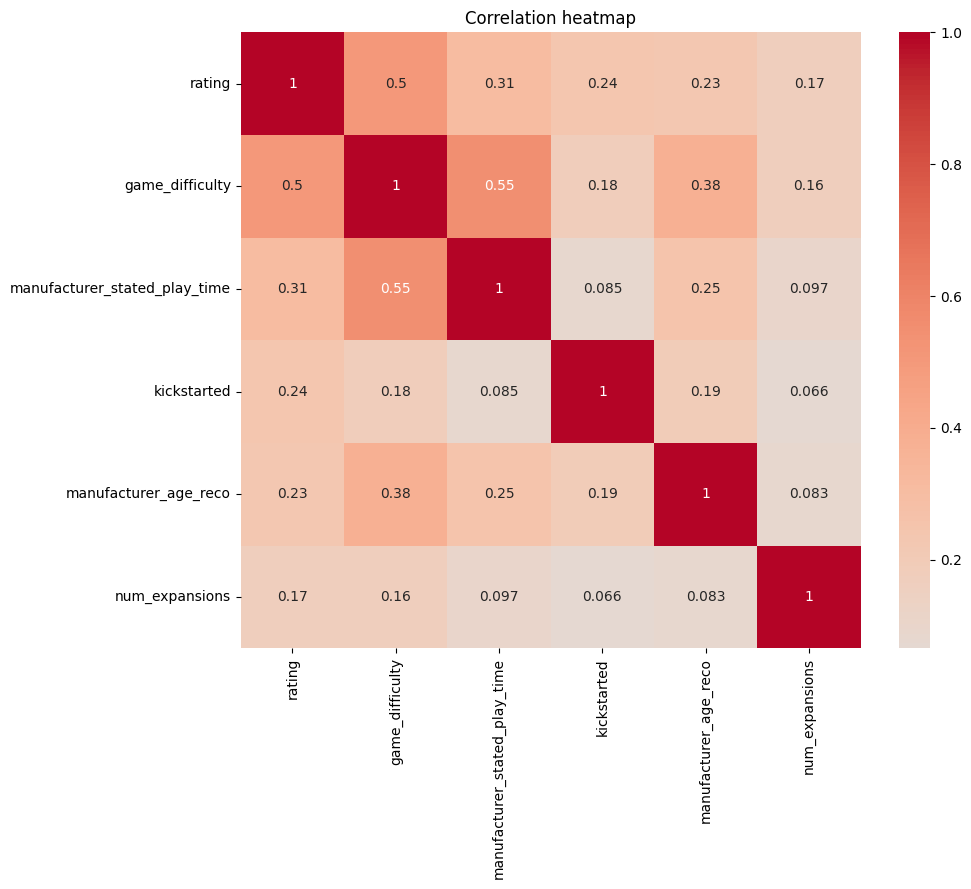

In [28]:
# Visualiser la matrice de corrélation avec un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation heatmap')
plt.show()

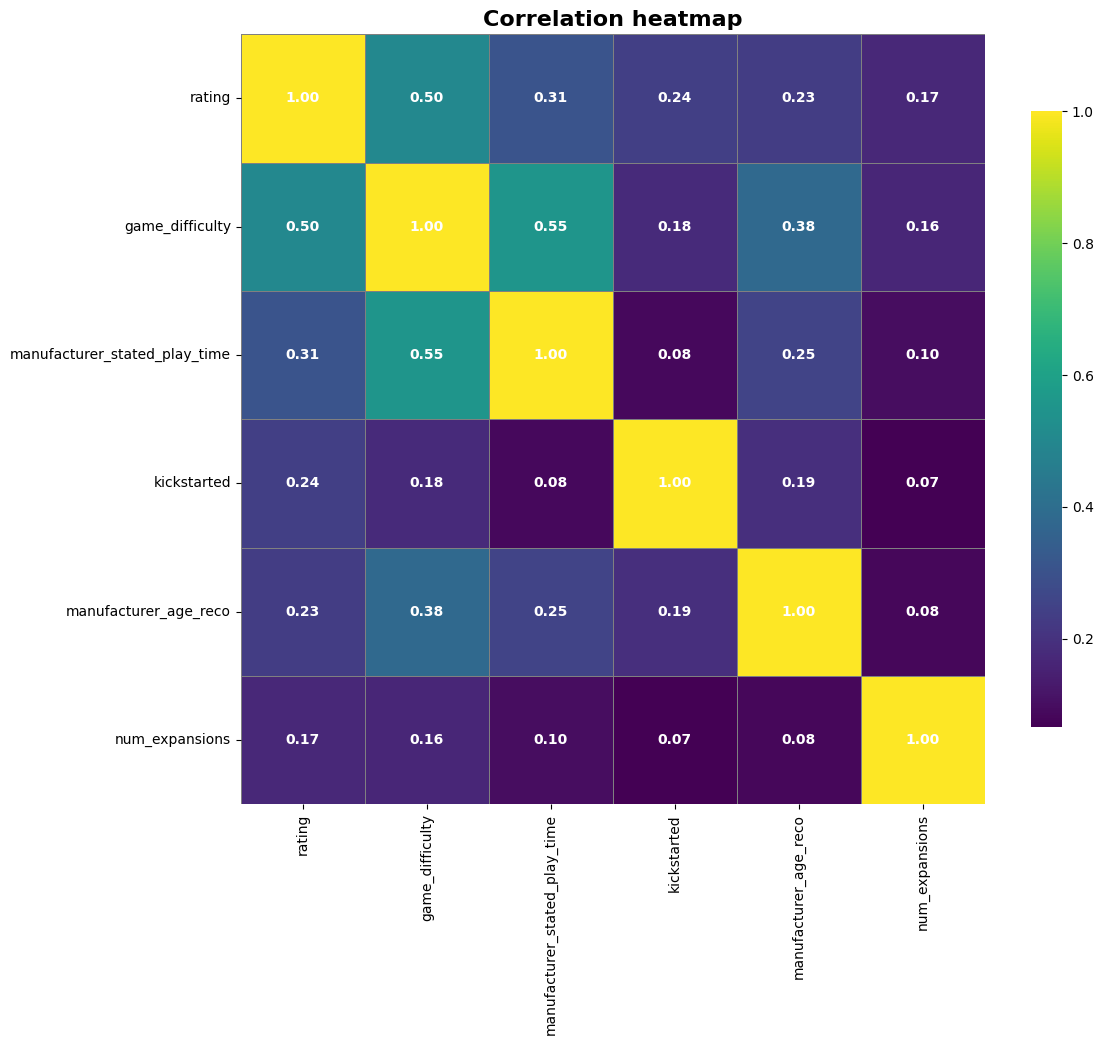

In [29]:
# test perso
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la figure
plt.figure(figsize=(12, 10))

# Visualisation de la heatmap avec des améliorations visuelles
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='viridis',  # Une palette de couleurs plus douce
            fmt='.2f',  # Affichage avec deux décimales
            linewidths=0.5,  # Ajout de petites bordures entre les cellules
            linecolor='gray',  # Couleur des bordures
            cbar_kws={'shrink': 0.8},  # Réduire la taille de la barre de couleur
            annot_kws={'size': 10, 'weight': 'bold', 'color': 'white'})  # Style des annotations

# Ajouter un titre
plt.title('Correlation heatmap', fontsize=16, fontweight='bold')

# Affichage de la heatmap
plt.show()

<b>Additional observations: </b> <br>
- Game difficulty may arise with play time  <br>
- Regarding kickstarter, this correlation might be explained by the fact that launching a Kickstarter campaign be very selective so it ensures the quality of the game <br>
-  Difficulty goes up with age reco, which is logical


# Models of prediction

### 1. Linear regression

Linear regression is a fundamental statistical method used to model the relationship between a dependent variable (continuous) and one or more independent variables. It allows us to quantify the impact of each predictor on the target variable while controlling for the effects of others. This regression is particularly useful for making predictions, understanding trends, and identifying key factors that influence an outcome. Its simplicity, interpretability, and efficiency make it one of the most widely used techniques in data analysis and machine learning.

Since our target variable (rating) is continuous, and our predictor variables (X) are either continuous or discrete (binary), we will use a linear regression model. <br>
Linear regression allows us to quantify the relationship between the predictors and the target variable, assessing how each feature influences the rating of a given board game.
Additionally, it helps identify which features have a statistically significant impact and how strong their effects are, providing valuable insights for game designers and publishers.

In [30]:
# import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [31]:
# let's select our X and our y
columns_of_interest = [
    'game_difficulty', 'manufacturer_stated_play_time', 
    'kickstarted', 'manufacturer_age_reco', 'num_expansions'
]

X = final_df[columns_of_interest]
y = final_df['rating']

In [32]:
# Add a constant for the intercept term
X = sm.add_constant(X)

In [33]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# other method :  Create and train the linear regression model with statsmodels
model = sm.OLS(y_train, X_train).fit()

In [35]:
# Make predictions on the test set
y_pred_lin_reg = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred_lin_reg)
r2 = r2_score(y_test, y_pred_lin_reg)

In [36]:
# Affichage des coefficients et des p-values
print(model.params)
print(model.pvalues)

const                            5.211887
game_difficulty                  0.541097
manufacturer_stated_play_time    0.000446
kickstarted                      0.348500
manufacturer_age_reco            0.005525
num_expansions                   0.008866
dtype: float64
const                            0.000000e+00
game_difficulty                  0.000000e+00
manufacturer_stated_play_time    2.298157e-03
kickstarted                      2.567740e-87
manufacturer_age_reco            1.048979e-02
num_expansions                   6.235811e-29
dtype: float64


Interpretation: <br>
All things being equal, we can see that p-value < 0.05 for each of our variables.<br>
- manufacturer_stated_play_time (p = 0.0023) → significant but weak impact <br>
- manufacturer_age_reco (p = 0.01) → significant but weak impact <br>
- other variables: significant impact on rating



In [37]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Afficher les coefficients du modèle
# Afficher les coefficients du modèle et les p-values
print(model.summary())

Mean Squared Error: 0.5762271967509207
R-squared: 0.30215347022331784
                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     1049.
Date:                Thu, 13 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:00:32   Log-Likelihood:                -15434.
No. Observations:               13465   AIC:                         3.088e+04
Df Residuals:                   13459   BIC:                         3.093e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

<b> Interpretation <b>

Mean Squared Error (MSE) : 0.5762 <br>
R-squared (R²) : 0.3022 <br>
Durbin-Watson : 1.987


The Durbin-Watson test measures the autocorrelation of the residuals (the model errors). A value close to 2 indicates that there is no significant autocorrelation between the errors. 
<br>Here, the value of 1.987 suggests that there is no autocorrelation, which is a good thing.

Significance: The majority of the variables are statistically significant (with p-values close to 0), meaning they have a measurable impact on the game ratings.

Moderate R²: Although the model has an R² of 30%, which indicates it explains only part of the variance in the ratings, it is still useful for predicting game scores.

In [38]:

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
reg = LinearRegression().fit(X_train, y_train)

# Calcul du score de prédiction
score = reg.score(X_test, y_test)

print("Prediction for the variable rating : ", score)

Prediction for the variable rating :  0.3021534702233192


--> My model explains only 30%, which is normal because we are working with discrete variables while my target (y) is a linear variable. Other predictive models will allow me to achieve a better score.

Linear or logistic regression has helped me ensure that my variables have a significant impact on the rating variable

### 2. Random Forest (Regressor)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [40]:
# let's select our X and our y
columns_of_interest = [
    'game_difficulty', 'manufacturer_stated_play_time', 
    'kickstarted', 'manufacturer_age_reco', 'num_expansions'
]

X_lin = final_df[columns_of_interest]
y_lin = final_df['rating']

In [41]:
# Diviser les données en ensembles d'entraînement et de test
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

In [42]:
# Créer un objet RandomForestRegressor avec 100 arbres de décision
rfr_lin = RandomForestRegressor(n_estimators=100, random_state=42)

In [43]:
# Entraîner le modèle avec les données d'apprentissage
rfr_lin.fit(X_train_lin, y_train_lin)

# Faire des prédictions sur l'ensemble de test
y_pred_lin = rfr_lin.predict(X_test_lin)

In [44]:
# Évaluer le modèle
mse = mean_squared_error(y_test_lin, y_pred_lin)
r2 = r2_score(y_test_lin, y_pred_lin)
mae = mean_absolute_error(y_test_lin, y_pred_lin)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.631757598449084
R-squared: 0.23490274283545542
Mean Absolute Error: 0.6208071070051401


In [45]:
# Afficher les importances des caractéristiques
feature_importances = pd.DataFrame(rfr_lin.feature_importances_, index=columns_of_interest, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

                               Importance
game_difficulty                  0.541294
manufacturer_stated_play_time    0.164535
manufacturer_age_reco            0.154187
num_expansions                   0.107599
kickstarted                      0.032385


### 2Bis. Logistic regression

In order to allow a logistic regression, we first need to to tranform the rating onto different categories / levels

In [46]:
# Convertir 'rating' en catégories (par exemple, faible, moyen, élevé)
# Vous pouvez ajuster les seuils selon vos besoins
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
final_df['rating_category'] = pd.cut(final_df['rating'], bins=bins, labels=labels)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# let's select our X and our y
columns_of_interest = [
    'game_difficulty', 'manufacturer_stated_play_time', 
    'kickstarted', 'manufacturer_age_reco', 'num_expansions'
]


# Attribution des variables explicatives et la variable à expliquer en prenant en compte les étapes ci-dessus
X2 = final_df[columns_of_interest]
y2 = final_df['rating_category']

# Diviser les données en ensemble d'entraînement et ensemble de test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle de régression logistique
logreg2 = LogisticRegression()
logreg2.fit(X2_train, y2_train)

# Prédiction sur les données de test
y2_pred = logreg2.predict(X2_test)

# Calcul de la précision
ScoreL = accuracy_score(y2_test, y2_pred)
print("Score de la regression logistique est =", ScoreL)

Score de la regression logistique est = 0.7912087912087912


c:\Users\m.elbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2Ter.  Random Forest classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
# Convertir 'rating' en catégories (par exemple, faible, moyen, élevé)
# Vous pouvez ajuster les seuils selon vos besoins
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
final_df['rating_category'] = pd.cut(final_df['rating'], bins=bins, labels=labels)


In [50]:
# let's select our X and our y
columns_of_interest = [
    'game_difficulty', 'manufacturer_stated_play_time', 
    'kickstarted', 'manufacturer_age_reco', 'num_expansions'
]

X_lin = final_df[columns_of_interest]
y_lin = final_df['rating_category']


In [51]:
# Diviser les données en ensembles d'entraînement et de test
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)


In [52]:
# Créer un objet RandomForestClassifier avec 100 arbres de décision
rfc_lin = RandomForestClassifier(n_estimators=100, random_state=42)

In [53]:
# Entraîner le modèle avec les données d'apprentissage
rfc_lin.fit(X_train_lin, y_train_lin)

RandomForestClassifier(random_state=42)

In [54]:
# Faire des prédictions sur l'ensemble de test
y_pred_lin = rfc_lin.predict(X_test_lin)

In [55]:
# Évaluer le modèle
accuracy = accuracy_score(y_test_lin, y_pred_lin)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7674487674487674


In [56]:
# Afficher le rapport de classification
print("Classification Report:")
print(classification_report(y_test_lin, y_pred_lin))

Classification Report:
              precision    recall  f1-score   support

        High       0.59      0.47      0.52       876
         Low       0.00      0.00      0.00        20
      Medium       0.82      0.88      0.85      2471

    accuracy                           0.77      3367
   macro avg       0.47      0.45      0.46      3367
weighted avg       0.75      0.77      0.76      3367



In [57]:
# Score
acurracy_test_rf = accuracy_score(y_test_lin, y_pred_lin)

print("Score du Random Forest = ", acurracy_test_rf)

# Calculer la précision, le rappel et le score F1
precision = precision_score(y_test_lin, y_pred_lin, average='macro')
recall = recall_score(y_test_lin, y_pred_lin, average='macro')
f1 = f1_score(y_test_lin, y_pred_lin, average='macro')

# Afficher les résultats
print("Précision : ", precision)
print("Rappel : ", recall)
print("Score F1 : ", f1)

Score du Random Forest =  0.7674487674487674
Précision :  0.4683222038515574
Rappel :  0.4500176168362749
Score F1 :  0.45672322190271974


In [58]:
# Afficher la matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_test_lin, y_pred_lin))

# Afficher les importances des caractéristiques
feature_importances = pd.DataFrame(rfc_lin.feature_importances_, index=columns_of_interest, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)

Confusion Matrix:
[[ 413    1  462]
 [   0    0   20]
 [ 291    9 2171]]
                               Importance
game_difficulty                  0.511428
manufacturer_stated_play_time    0.186927
manufacturer_age_reco            0.136563
num_expansions                   0.134647
kickstarted                      0.030436


In [59]:
# Calcul du score d'entraînement 

Y_lin = rfc_lin.predict(X_train_lin)
Score_Train_lin = accuracy_score(y_train_lin, Y_lin)
print(Score_Train_lin)

0.9317489788340141


### 3. XG Boost

In [60]:
# Importing the right things
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [61]:
# let's select our X and our y

bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
final_df['rating_category'] = pd.cut(final_df['rating'], bins=bins, labels=labels)

columns_of_interest = [
    'game_difficulty', 'manufacturer_stated_play_time', 
    'kickstarted', 'manufacturer_age_reco', 'num_expansions'
    ]

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Convert the categorical target into numeric labels
label_encoder = LabelEncoder()
yg = label_encoder.fit_transform(final_df['rating_category'])

# Split the data
Xg_train, Xg_test, yg_train, yg_test = train_test_split(X, yg, test_size=0.2, random_state=42)

# XGBoost classification model
xg_clf = xgb.XGBClassifier(objective='multi:softmax', colsample_bytree=0.3, learning_rate=0.3,
                           max_depth=50, alpha=10, n_estimators=100)

# Train the model
xg_clf.fit(Xg_train, yg_train)

# Predicting the values
yg_pred = xg_clf.predict(Xg_test)
yg_train_pred = xg_clf.predict(Xg_train)

# Score Accuracy on Test
accuracy_test_xgb = accuracy_score(yg_test, yg_pred)
print("Accuracy on Test: ", accuracy_test_xgb)

# Accuracy on Train
accuracy_train = accuracy_score(yg_train, yg_train_pred)
print("Accuracy on Train: ", accuracy_train)

# We could also calculate confusion matrix, classification report, etc., for a more detailed evaluation


Accuracy on Test:  0.795069795069795
Accuracy on Train:  0.7947270701819532


### 4. Gradient boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convertir la variable cible en étiquettes numériques (si ce n'est pas déjà fait)
label_encoder = LabelEncoder()
yg = label_encoder.fit_transform(final_df['rating_category'])

# Séparer les données en ensembles d'entraînement et de test
Xg_train, Xg_test, yg_train, yg_test = train_test_split(X, yg, test_size=0.2, random_state=42)

# Créer le modèle de Gradient Boosting pour la classification
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entraîner le modèle
gb_clf.fit(Xg_train, yg_train)

# Prédire les valeurs pour l'ensemble de test et d'entraînement
yg_pred = gb_clf.predict(Xg_test)
yg_train_pred = gb_clf.predict(Xg_train)

# Score d'accuracy sur le test
accuracy_test_gb = accuracy_score(yg_test, yg_pred)
print("Accuracy on Test: ", accuracy_test_gb)

# Accuracy sur l'ensemble d'entraînement
accuracy_train_gb = accuracy_score(yg_train, yg_train_pred)
print("Accuracy on Train: ", accuracy_train_gb)

# Rapport de classification pour plus de détails
print("\nClassification Report (Test):")
print(classification_report(yg_test, yg_pred))

# Matrice de confusion (facultatif)
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix (Test):")
print(confusion_matrix(yg_test, yg_pred))


Accuracy on Test:  0.7965547965547966
Accuracy on Train:  0.8051243965837356

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.69      0.44      0.54       876
           1       0.00      0.00      0.00        20
           2       0.82      0.93      0.87      2471

    accuracy                           0.80      3367
   macro avg       0.50      0.46      0.47      3367
weighted avg       0.78      0.80      0.78      3367


Confusion Matrix (Test):
[[ 386    0  490]
 [   0    0   20]
 [ 175    0 2296]]


c:\Users\m.elbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\m.elbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\m.elbaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

### 5. ROC & AUC

Étant donné que ton problème est multiclass (Low, Medium, High), il faut binariser les classes :

In [64]:
# 📌 Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [65]:


# 📌 1. Préparation des données
# Transformation de la variable 'rating' en catégories
bins = [0, 4, 7, 10]
labels = ['Low', 'Medium', 'High']
final_df['rating_category'] = pd.cut(final_df['rating'], bins=bins, labels=labels)

# Sélection des colonnes pertinentes
columns_of_interest = ['game_difficulty', 'manufacturer_stated_play_time', 
                       'kickstarted', 'manufacturer_age_reco', 'num_expansions']

X = final_df[columns_of_interest]
y = final_df['rating_category']

# Encoder la variable cible
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Low -> 0, Medium -> 1, High -> 2

# Séparer les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Binariser la variable cible pour la ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])



In [66]:
# 📌 2. Entraînement des modèles

# 🔹 XGBoost
xgb_clf = XGBClassifier(objective='multi:softmax', colsample_bytree=0.3, learning_rate=0.3,
                        max_depth=50, alpha=10, n_estimators=100)
xgb_clf.fit(X_train, y_train)
y_proba_xgb = xgb_clf.predict_proba(X_test)

# 🔹 Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)
y_proba_gb = gb_clf.predict_proba(X_test)

# 🔹 Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_proba_rf = rf_clf.predict_proba(X_test)

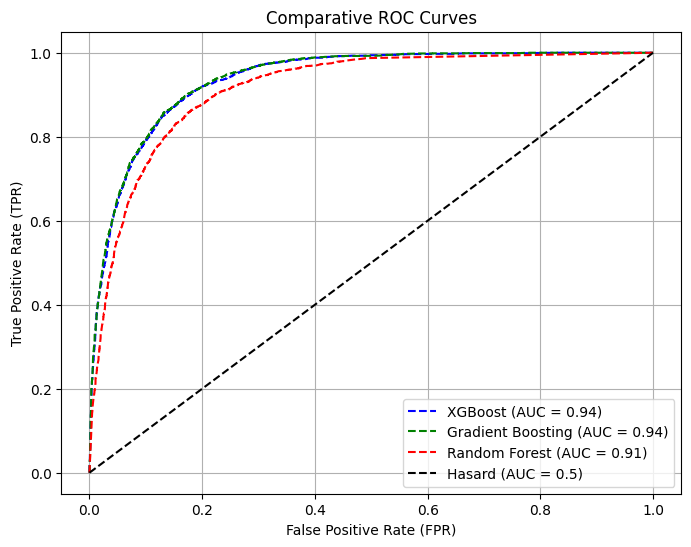

In [67]:
# 📌 3. Tracer la courbe ROC pour chaque modèle

# Liste des modèles et couleurs
models = {'XGBoost': y_proba_xgb, 'Gradient Boosting': y_proba_gb, 'Random Forest': y_proba_rf}
colors = {'XGBoost': 'blue', 'Gradient Boosting': 'green', 'Random Forest': 'red'}

# Initialisation du graphique
plt.figure(figsize=(8, 6))

# Tracer chaque courbe ROC
for model_name, y_proba in models.items():
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())  # Moyenne sur toutes les classes
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--', color=colors[model_name], label=f'{model_name} (AUC = {roc_auc:.2f})')

# Ajouter la ligne de hasard
plt.plot([0, 1], [0, 1], 'k--', label='Hasard (AUC = 0.5)')

# Personnalisation du graphique
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Comparative ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Success = Random Forest

# Predicting the rating

### Prédire des données librement en classification

In [67]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [70]:
# Fonction pour demander à l'utilisateur les valeurs d'entrée
def get_input():
    print("Entrez les valeurs suivantes :")
    
    game_difficulty = float(input("Difficulté du jeu (game_difficulty) : "))
    manufacturer_stated_play_time = float(input("Temps de jeu selon le fabricant (manufacturer_stated_play_time) : "))
    kickstarted = int(input("Kickstarter (1 pour Oui, 0 pour Non) : "))
    manufacturer_age_reco = float(input("Âge recommandé par le fabricant (manufacturer_age_reco) : "))
    num_expansions = int(input("Nombre d'extensions (num_expansions) : "))
    
    # Créer un DataFrame avec les valeurs d'entrée
    input_data = pd.DataFrame([[game_difficulty, manufacturer_stated_play_time, kickstarted, manufacturer_age_reco, num_expansions]], 
                               columns=['game_difficulty', 'manufacturer_stated_play_time', 'kickstarted', 'manufacturer_age_reco', 'num_expansions'])
    return input_data

# Obtenir les entrées de l'utilisateur
input_data = get_input()

# Prédire la catégorie de notation (rating_category) avec le modèle RandomForest
rating_prediction = rfc_lin.predict(input_data)

# Afficher le résultat
print(f"La catégorie de notation prédite est : {rating_prediction[0]}")


Entrez les valeurs suivantes :
La catégorie de notation prédite est : High


### Prédire des données librement en Regression

In [69]:
import pandas as pd

# Fonction pour demander à l'utilisateur les valeurs d'entrée
def get_input():
    print("Entrez les valeurs suivantes :")
    
    game_difficulty = float(input("Difficulté du jeu (game_difficulty) : "))
    manufacturer_stated_play_time = float(input("Temps de jeu selon le fabricant (manufacturer_stated_play_time) : "))
    kickstarted = int(input("Kickstarter (1 pour Oui, 0 pour Non) : "))
    manufacturer_age_reco = float(input("Âge recommandé par le fabricant (manufacturer_age_reco) : "))
    num_expansions = int(input("Nombre d'extensions (num_expansions) : "))
    
    # Créer un DataFrame avec les valeurs d'entrée
    input_data = pd.DataFrame([[game_difficulty, manufacturer_stated_play_time, kickstarted, manufacturer_age_reco, num_expansions]], 
                               columns=['game_difficulty', 'manufacturer_stated_play_time', 'kickstarted', 'manufacturer_age_reco', 'num_expansions'])
    return input_data

# Obtenir les entrées de l'utilisateur
input_data = get_input()

# Prédire la note (rating) avec le modèle RandomForestRegressor
rating_prediction = rfr_lin.predict(input_data)

# Afficher le résultat
print(f"La note prédite est : {rating_prediction[0]}")


Entrez les valeurs suivantes :
La note prédite est : 7.276449999999999
